## Plot of model extensions

Code to plot model with covariates and targeted sampling


In [221]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot') 
plt.style.use('seaborn-paper') 
plt.style.use('seaborn-whitegrid') 

In [222]:
multi_res = pd.read_csv('../results/covariate_results.txt',header=0,names=['filename','true','multi_mean','multi_mean_frac','multi_lci','multi_lci_frac','multi_uci','multi_uci_frac','coeff'])

In [224]:
means = (multi_res.multi_mean-multi_res.true).values.reshape((-1,2)).mean(axis=0)
lcis = (multi_res.multi_lci-multi_res.true).values.reshape((-1,2)).mean(axis=0)
ucis = (multi_res.multi_uci-multi_res.true).values.reshape((-1,2)).mean(axis=0)



In [225]:
(multi_res.multi_mean-multi_res.true).values[::2].mean()

-36799.25

In [226]:
print(means)
print(lcis)
print(ucis)

2.667*2

[-36799.25 -73218.8 ]
[-136748.405 -176783.805]
[74832.195 48985.97 ]


5.334

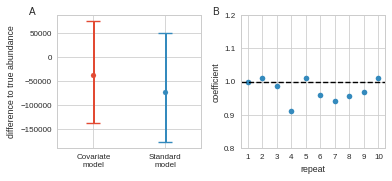

In [229]:
fig, axs = plt.subplots( 1,2, figsize=(5.33,2.4), constrained_layout=True)
#plt.figure(figsize=(2.667,2.4))

x = 0.5+np.arange(2)

axs[0].scatter(0.5, means[0],marker='o',c='C0',s=25)
axs[0].vlines(x=0.502, ymin=lcis[0], ymax=ucis[0], colors='C0', lw=2)
axs[0].scatter(0.5, lcis[0], marker='_',c='C0',s=200)
axs[0].scatter(0.5, ucis[0], marker='_',c='C0',s=200)

axs[0].scatter(1.5, means[1],marker='o',c='C1',s=25)
axs[0].vlines(x=1.502, ymin=lcis[1], ymax=ucis[1], colors='C1', lw=2)
axs[0].scatter(1.5, lcis[1], marker='_',c='C1',s=200)
axs[0].scatter(1.5, ucis[1], marker='_',c='C1',s=200)

axs[0].set_xlim(0,2)
axs[0].set_xticks(x, minor=False) 
axs[0].set_xticklabels( ['Covariate\nmodel', 'Standard\nmodel'],minor=False) 
axs[0].set_ylabel('difference to true abundance')
coeff_vals = multi_res.coeff.values
coeff_vals = coeff_vals[np.isfinite(coeff_vals)]
#axs[1].set_xlim(0,10)
axs[1].set_xticks(np.arange(1,11), minor=False) 
#axs[1].set_xticklabels( ['Covariate\nmodel', 'Random\nmodel'],minor=False) 
axs[1].plot(np.arange(1,11),coeff_vals,'o',c='C1')
axs[1].axhline(1.0,ls='--',c='k')
axs[1].set_ylim(0.8,1.2)
axs[1].set_ylabel('coefficient')
axs[1].set_xlabel('repeat')
axs[1].set_yticks(np.arange(0.8,1.21,0.1), minor=False) 

axs[0].text(-0.2,1,'A', size=10, transform=axs[0].transAxes)
axs[1].text(-0.2,1,'B', size=10, transform=axs[1].transAxes)
plt.savefig("covariate_plot.pdf",bbox_inches='tight')

plt.show()

In [196]:
axs.shape

(2,)

In [230]:
sample_res = pd.read_csv('../results/sampling_results.txt',header=0,names=['filename','true','multi_mean','multi_mean_frac','multi_lci','multi_lci_frac','multi_uci','multi_uci_frac'])

In [234]:
means = (sample_res.multi_mean-sample_res.true).values.reshape((-1,3)).mean(axis=0)
lcis = (sample_res.multi_lci-sample_res.true).values.reshape((-1,3)).mean(axis=0)
ucis = (sample_res.multi_uci-sample_res.true).values.reshape((-1,3)).mean(axis=0)


In [235]:
print(means)
print(lcis)
print(ucis)

[-30489.9   13657.65 -12110.05]
[-147763.445 -111825.28  -128485.725]
[103524.33 158464.61 119768.28]


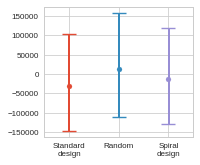

In [276]:
#fig, axs = plt.subplots(2, 3, figsize=(8,4.8),sharex=True,sharey=True, constrained_layout=True)
plt.figure(figsize=(2.667,2.4))

x = 0.5+np.arange(3)

plt.scatter(0.5, means[0],marker='o',c='C0',s=25)
plt.vlines(x=0.502, ymin=lcis[0], ymax=ucis[0], colors='C0', lw=2)
plt.scatter(0.5, lcis[0], marker='_',c='C0',s=200)
plt.scatter(0.5, ucis[0], marker='_',c='C0',s=200)

plt.scatter(1.5, means[1],marker='o',c='C1',s=25)
plt.vlines(x=1.502, ymin=lcis[1], ymax=ucis[1], colors='C1', lw=2)
plt.scatter(1.5, lcis[1], marker='_',c='C1',s=200)
plt.scatter(1.5, ucis[1], marker='_',c='C1',s=200)

plt.scatter(2.5, means[2],marker='o',c='C2',s=25)
plt.vlines(x=2.502, ymin=lcis[2], ymax=ucis[2], colors='C2', lw=2)
plt.scatter(2.5, lcis[2], marker='_',c='C2',s=200)
plt.scatter(2.5, ucis[2], marker='_',c='C2',s=200)


plt.xlim(0,3)
plt.xticks(x, ['Standard\ndesign', 'Random', 'Spiral\ndesign']) 
#plt.savefig("covariate_plot.pdf",bbox_inches='tight')

plt.savefig("sampling_results.pdf",bbox_inches='tight')
plt.show()

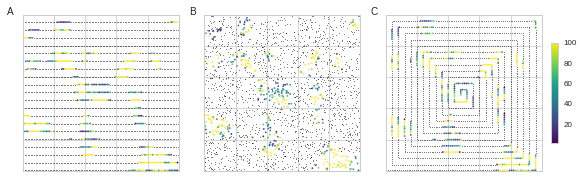

In [275]:
standardname = '../data/simdata/sampledata_standard_p2.0_r0.csv'
randomname = '../data/simdata/sampledata_random_p2.0_r0.csv'
spiralname = '../data/simdata/sampledata_spiral_p2.0_r0.csv'

filenamelist = [standardname,randomname,spiralname]
fig, axs = plt.subplots(1, 3, figsize=(8,2.4),sharex=True,sharey=True, constrained_layout=True)


for i in range(3):
    df =pd.read_csv(filenamelist[i])
    trueW = df[df.transect_id<0].wildebeest.values[0]
    df = df[df.transect_id>0]


    X = df[['x','y']].values#/1000
    wdata = df['wildebeest'].values.astype(np.float64)

    ax11 = axs[i].scatter(X[wdata>0,0],X[wdata>0,1],c=wdata[wdata>0],s=2,cmap='viridis',vmax=100)

    ax11a = axs[i].scatter(X[wdata==0,0],X[wdata==0,1],s=1,marker='.',c='k')
    axs[i].set_ylim(0,50000)
    axs[i].set_xlim(0,50000)

    axs[i].set_aspect('equal')
    
    
axs[0].text(-0.1,1,'A', size=10, transform=axs[0].transAxes)
axs[1].text(-0.1,1,'B', size=10, transform=axs[1].transAxes)
axs[2].text(-0.1,1,'C', size=10, transform=axs[2].transAxes)


axs[0].tick_params( labelleft=False, labelbottom=False) 
axs[1].tick_params( labelleft=False, labelbottom=False) 
axs[2].tick_params( labelleft=False, labelbottom=False) 
cbar = fig.colorbar(ax11, ax=axs[2],fraction = 0.1, shrink=0.6,aspect=50)#,format=formatter)

cbar.ax.tick_params(labelsize=8) 

plt.savefig("sampling_design.pdf",bbox_inches='tight')
plt.show()